   trial_number                                             params      value  \
0             0  {'num_iterations': 727, 'num_leaves': 1546, 'l...  345240797   
1             1  {'num_iterations': 344, 'num_leaves': 645, 'le...  351420259   
2             2  {'num_iterations': 774, 'num_leaves': 1881, 'l...  344907806   
3             3  {'num_iterations': 532, 'num_leaves': 786, 'le...  336295226   
4             4  {'num_iterations': 457, 'num_leaves': 1650, 'l...  350323065   

                    datetime  \
0 2025-10-09 20:21:44.641279   
1 2025-10-09 20:24:08.388526   
2 2025-10-09 20:26:48.719299   
3 2025-10-09 20:31:54.190164   
4 2025-10-09 20:34:45.298558   

                                        ganancias_cv     state  
0  [265968000.0, 271756000.0, 275808000.0, 275548...  COMPLETE  
1  [293888000.0, 308136000.0, 312984000.0, 318192...  COMPLETE  
2  [255344000.0, 271708000.0, 290188000.0, 292388...  COMPLETE  
3  [270784000.0, 285008000.0, 295320000.0, 294596...  COMPLE

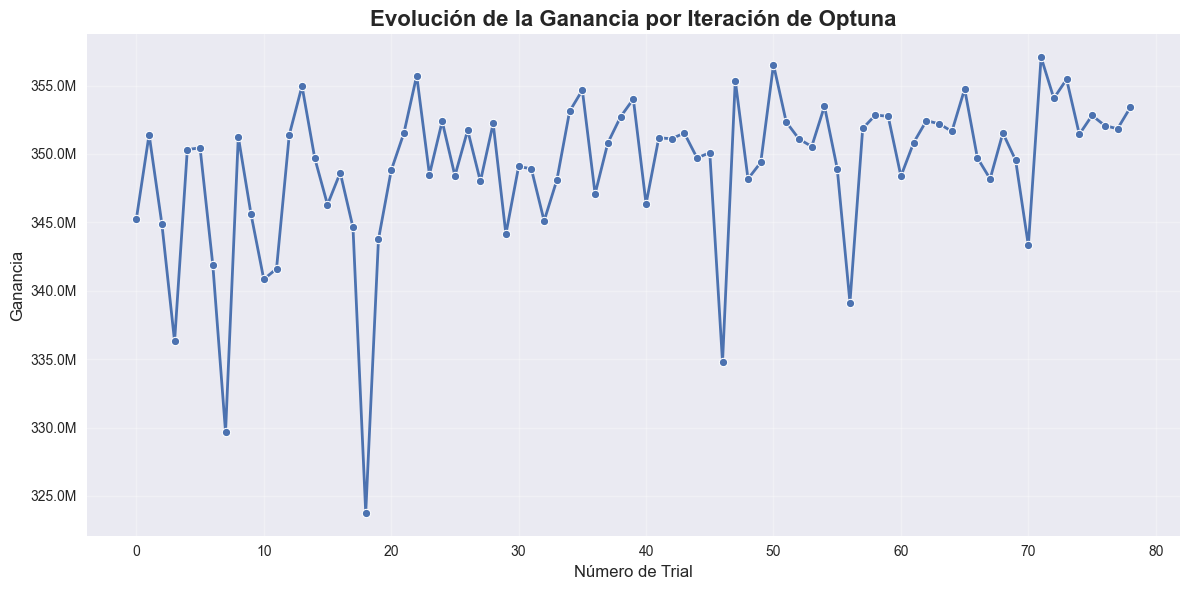


Estadísticas de ganancia:
Ganancia máxima: 357,069,961
Ganancia mínima: 323,754,808
Ganancia promedio: 349,057,401
Trial con mejor ganancia: 71


In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json("resultados/lgb_optimization_cv_competencia01_b_iteraciones.json")
print(df.head())

#Graficar ganancia Optuna eje x trial_number eje y ganancia
# Configurar el estilo
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))

# Crear el gráfico
sns.lineplot(data=df, x='trial_number', y='value', marker='o', linewidth=2, markersize=6)

# Personalizar el gráfico
plt.title('Evolución de la Ganancia por Iteración de Optuna', fontsize=16, fontweight='bold')
plt.xlabel('Número de Trial', fontsize=12)
plt.ylabel('Ganancia', fontsize=12)
plt.grid(True, alpha=0.3)

# Formatear el eje y para mostrar valores en millones
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Mostrar estadísticas básicas
print(f"\nEstadísticas de ganancia:")
print(f"Ganancia máxima: {df['value'].max():,.0f}")
print(f"Ganancia mínima: {df['value'].min():,.0f}")
print(f"Ganancia promedio: {df['value'].mean():,.0f}")
print(f"Trial con mejor ganancia: {df.loc[df['value'].idxmax(), 'trial_number']}")